The code in this file has the purpose of generating graphs from csv files.
Originallly made for tensorboard. 

In [45]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from utils import parse_id
import numpy as np


In [46]:
root = '/home/tiago/Dropbox/research/multiview_segmentation/etc/results'
target_dir = 'weighted_channel_loss'
#target_file = 'weighted-channel-loss_greenai_70-30.csv'
target_files = ['crossval-valdoeiro.csv','crossval-esac.csv','crossval-qbaixo.csv']
#target_files = ['crossval-qbaixo.csv']
#target_files = ['crossval-valdoeiro.csv']
#target_files = ['crossval-qbaixo.csv']

out_path = os.path.join(root,target_dir)

full_target_files = []

for target_file in target_files:
    path_target_file = os.path.join(root,target_dir,target_file)

    if not os.path.isfile(path_target_file):
        raise NameError

    print('\nLoading: ' + path_target_file)
    
    full_target_files.append(path_target_file)


Loading: /home/tiago/Dropbox/research/multiview_segmentation/etc/results/weighted_channel_loss/crossval-valdoeiro.csv

Loading: /home/tiago/Dropbox/research/multiview_segmentation/etc/results/weighted_channel_loss/crossval-esac.csv

Loading: /home/tiago/Dropbox/research/multiview_segmentation/etc/results/weighted_channel_loss/crossval-qbaixo.csv


In [47]:
def find_tag(array,tag,type_cmp='in'):
    vector = []
    for i,line in enumerate(array):
        if type_cmp == 'in':
            if tag in line:
                vector.append(i)
        elif(type_cmp == '=='):
            if tag == line:
                vector.append(i)
    return(vector)

In [48]:

xx_name = 'feat_layers'
yy_name = 'mDice'
plot_name = 'MultiViewSegNet'
base_model = 'SegNet'
yy_values = []
xx_values = []

for target_file in full_target_files:
    df = pd.read_csv(target_file)

    names = df['model'].to_numpy()
    #name_splits = parse_id(names)
    idx = find_tag(names,plot_name,'in')
    ddf = df.loc[idx]
    print(ddf[yy_name])

    yy = ddf[yy_name].to_numpy()
    xx = ddf[xx_name].to_numpy()
    #xx_selected_value = df[xx_name][idx]
    yy_values.extend(yy)
    xx_values.extend(xx)
    


1    0.600926
3    0.630877
5    0.640387
7    0.657912
9    0.554901
Name: mDice, dtype: float64
1    0.655448
3    0.602016
5    0.518066
Name: mDice, dtype: float64
1    0.667893
3    0.824747
5    0.777302
7    0.672608
9    0.797740
Name: mDice, dtype: float64


In [49]:
base_model = "SegNet"
base_yy_values =[]
base_xx_values =[]
for target_file in full_target_files:
    df = pd.read_csv(target_file)

    names = df['model'].to_numpy()
    #name_splits = parse_id(names)
    idx = find_tag(names,base_model,'==')
    ddf = df.loc[idx]
    print(ddf[yy_name])

    yy = ddf[yy_name].to_numpy()
    xx = ddf[xx_name].to_numpy()
    #xx_selected_value = df[xx_name][idx]
    base_yy_values.extend(yy)
    base_xx_values.extend(xx)

base_mean = np.mean(base_yy_values)
base_std = np.std(base_yy_values)

10    0.659061
Name: mDice, dtype: float64
6    0.516092
Name: mDice, dtype: float64
10    0.777397
Name: mDice, dtype: float64


In [50]:

un_values = np.unique(xx_values)
y_value_man = []
y_value_std = []
for un_value in un_values:

    idx = find_tag(xx_values,un_value)    
    # idx = [ for i in enumerate(xx_values) un_values)

    print(un_value)
    
    x_value = un_value
    y_value = np.array(yy_values)[idx]

    y_value_man = np.append(y_value_man,np.mean(y_value))
    y_value_std = np.append(y_value_std,np.std(y_value))
    #print(f'mean {y_value_man} std {y_value_std}')


[0]
[1]
[2]
[3]
[4]


In [51]:

#plt.fill_between(range(len(un_values)),base_mean-base_std,base_mean+base_std,alpha=.1)



['[0]' '[1]' '[2]' '[3]' '[4]']
0.10683522215338681
0.6508498986562093


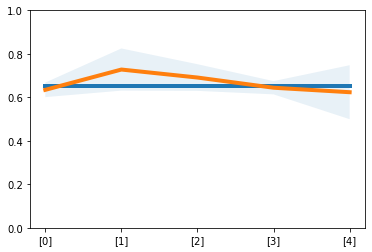

In [52]:
LINE_WIDTH = 4

print(un_values)
print(base_std)
print(base_mean)

base_std  = base_std*np.ones(len(un_values))
base_mean = base_mean*np.ones(len(un_values))

plt.plot(base_mean,linewidth = LINE_WIDTH)

plt.plot(y_value_man,linewidth  = LINE_WIDTH)

plt.fill_between(range(len(un_values)),y_value_man-y_value_std,y_value_man+y_value_std,alpha=.1)
plt.ylim(0,1)
plt.xticks(range(len(un_values)),un_values)

plt.savefig(join(out_path,plot_name) + '.pdf')
plt.savefig(join(out_path,plot_name) + '.png')

0    0.648171
2    0.742380
4    0.647296
6    0.689137
8    0.625437
Name: mDice, dtype: float64
MultiSegNet/ElemProd (max Dice 0.742)


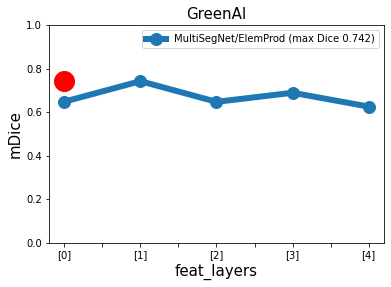

In [53]:
LINE_WIDTH = 6
MAX_POINT_SIZE = 20
LINE_MARKER_SIZE = 12 
AXIS_LABEL_SIZE = 15
AXIS_TICK_SIZE = 15
TITLE_SIZE = 15

max_values = []
min_values = []

xx_name = 'feat_layers'
yy_name = 'mDice'

plot_name = 'MultiSegNet'
title = 'GreenAI'

fig, ax = plt.subplots()
# Import CSV 
df = pd.read_csv(path_target_file)

for plot in ['MultiSegNet']:
    names = df['model']
    #name_splits = parse_id(names)
    idx = find_tag(names,plot)
    #plot_name = plot_name +'/'+ df['fusion'][0]
    plot_name = plot +'/'+ 'ElemProd'
    # ElemProd

    ddf = df.loc[idx]
    print(ddf[yy_name])
    #xx_selected_value = df[xx_name][idx]
    yy_values = ddf[yy_name].to_numpy()
    xx_values = ddf[xx_name].to_numpy()
    i_max = np.argmax(yy_values)
    max_value_yy = yy_values[i_max]
    max_value_xx = xx_values[i_max]
    
    #max_value_xx = ddf[xx_name].loc[i_max]

    label = plot_name + f' (max Dice {round(max_value_yy,3)})'
    print(label)

# Line 
    ax = ddf.plot(x=xx_name,y=yy_name,
            label      = label,
            linewidth  = LINE_WIDTH,
            marker     = 'o',
            markersize = LINE_MARKER_SIZE,
            ax = ax
            )
  
# Highlight Max Value
    ax.scatter(x=max_value_xx,y=max_value_yy,
            s =  (MAX_POINT_SIZE)**2,
            c ='r',
            alpha=1)

plt.xlabel(xx_name,fontsize=AXIS_LABEL_SIZE)
plt.ylabel(yy_name,fontsize=AXIS_LABEL_SIZE)
plt.title(title,fontsize=TITLE_SIZE)
plt.ylim(0,1)
#plt.legend(['MultiSegNet','','MultiViewSegNet',''])
#plt.yaxis.set_tick_params(labelsize=AXIS_TICK_SIZE)
#plt.xaxis.set_tick_params(labelsize=AXIS_TICK_SIZE)

plt.savefig(join(out_path,title) + '.pdf')
plt.savefig(join(out_path,title) + '.png')

KeyError: 'id'

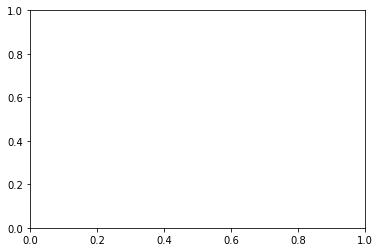

In [54]:
LINE_WIDTH = 6
MAX_POINT_SIZE = 20
LINE_MARKER_SIZE = 12 
AXIS_LABEL_SIZE = 15
AXIS_TICK_SIZE = 15
TITLE_SIZE = 15

max_values = []
min_values = []

xx_name = 'layer'
yy_name = 'mDice'
alpha = '0.3'

plot_name = 'MultiSegNet'
title = 'GreenAI-' + 'Channel-loss-' + alpha



fig, ax = plt.subplots()
# Import CSV 
df = pd.read_csv(path_target_file)
names = df['id']
name_splits = parse_id(names)
xx_values = name_splits[:,1]
df.insert(2, xx_name, xx_values, True)
modal_values = name_splits[:,3]
df.insert(3, 'model', modal_values, True)
print(df)
idx = find_tag(name_splits,alpha)
df = df.loc[idx]

for plot in ['MultiSegNet','MultiViewSegNet']:
    
    
    names = df['id']
    name_splits = parse_id(names)
    # Append new column 
    #xx_values = name_splits[:,1]
    #df.insert(2, xx_name, xx_values, True)
    model = df['model'].to_numpy()
    print(model)

    #idx = df['model'].str.find(plot)
    idx = find_tag(model,plot)
    

    ddf = df.iloc[idx]
    print(ddf[yy_name])
    #xx_selected_value = df[xx_name][idx]
    yy_values = ddf[yy_name].to_numpy()
    xx_values = ddf[xx_name].to_numpy()
    i_max = np.argmax(yy_values)
    max_value_yy = yy_values[i_max]
    max_value_xx = xx_values[i_max]
    
    #max_value_xx = ddf[xx_name].loc[i_max]
    plot_name = plot +'/'+ 'ElemProd'
    label = plot_name + f' (max Dice {round(max_value_yy,3)})'
    print(label)

# Line 
    ax = ddf.plot(x=xx_name,y=yy_name,
            label      = label,
            linewidth  = LINE_WIDTH,
            marker     = 'o',
            markersize = LINE_MARKER_SIZE,
            ax = ax
            )
  
# Highlight Max Value
    ax.scatter(x=max_value_xx,y=max_value_yy,
            s =  (MAX_POINT_SIZE)**2,
            c ='r',
            alpha=1)

plt.xlabel(xx_name,fontsize=AXIS_LABEL_SIZE)
plt.ylabel(yy_name,fontsize=AXIS_LABEL_SIZE)
plt.title(title,fontsize=TITLE_SIZE)
plt.ylim(0,1)
#plt.legend(['MultiSegNet','','MultiViewSegNet',''])
#plt.yaxis.set_tick_params(labelsize=AXIS_TICK_SIZE)
#plt.xaxis.set_tick_params(labelsize=AXIS_TICK_SIZE)

plt.savefig(join(out_path,title) + '.pdf')
plt.savefig(join(out_path,title) + '.png')